In [35]:
# import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# load data
data = pd.read_csv('moonshot.csv')
df = data[data['brand'].isin(['Acugen Health', 'Verity Diagnostics'])]
mdf = data[data["brand"] == "Moonshot Clinical"]
vdf = data[data["brand"] == "Verity Diagnostics"]
adf = data[data["brand"] == "Acugen Health"]

In [4]:
# Imputations for NaN
df = df.fillna(df.mean(), inplace=True)
mdf = mdf.fillna(mdf.mean(), inplace=True)
adf = mdf.fillna(adf.mean(), inplace=True)
vdf = mdf.fillna(vdf.mean(), inplace=True)

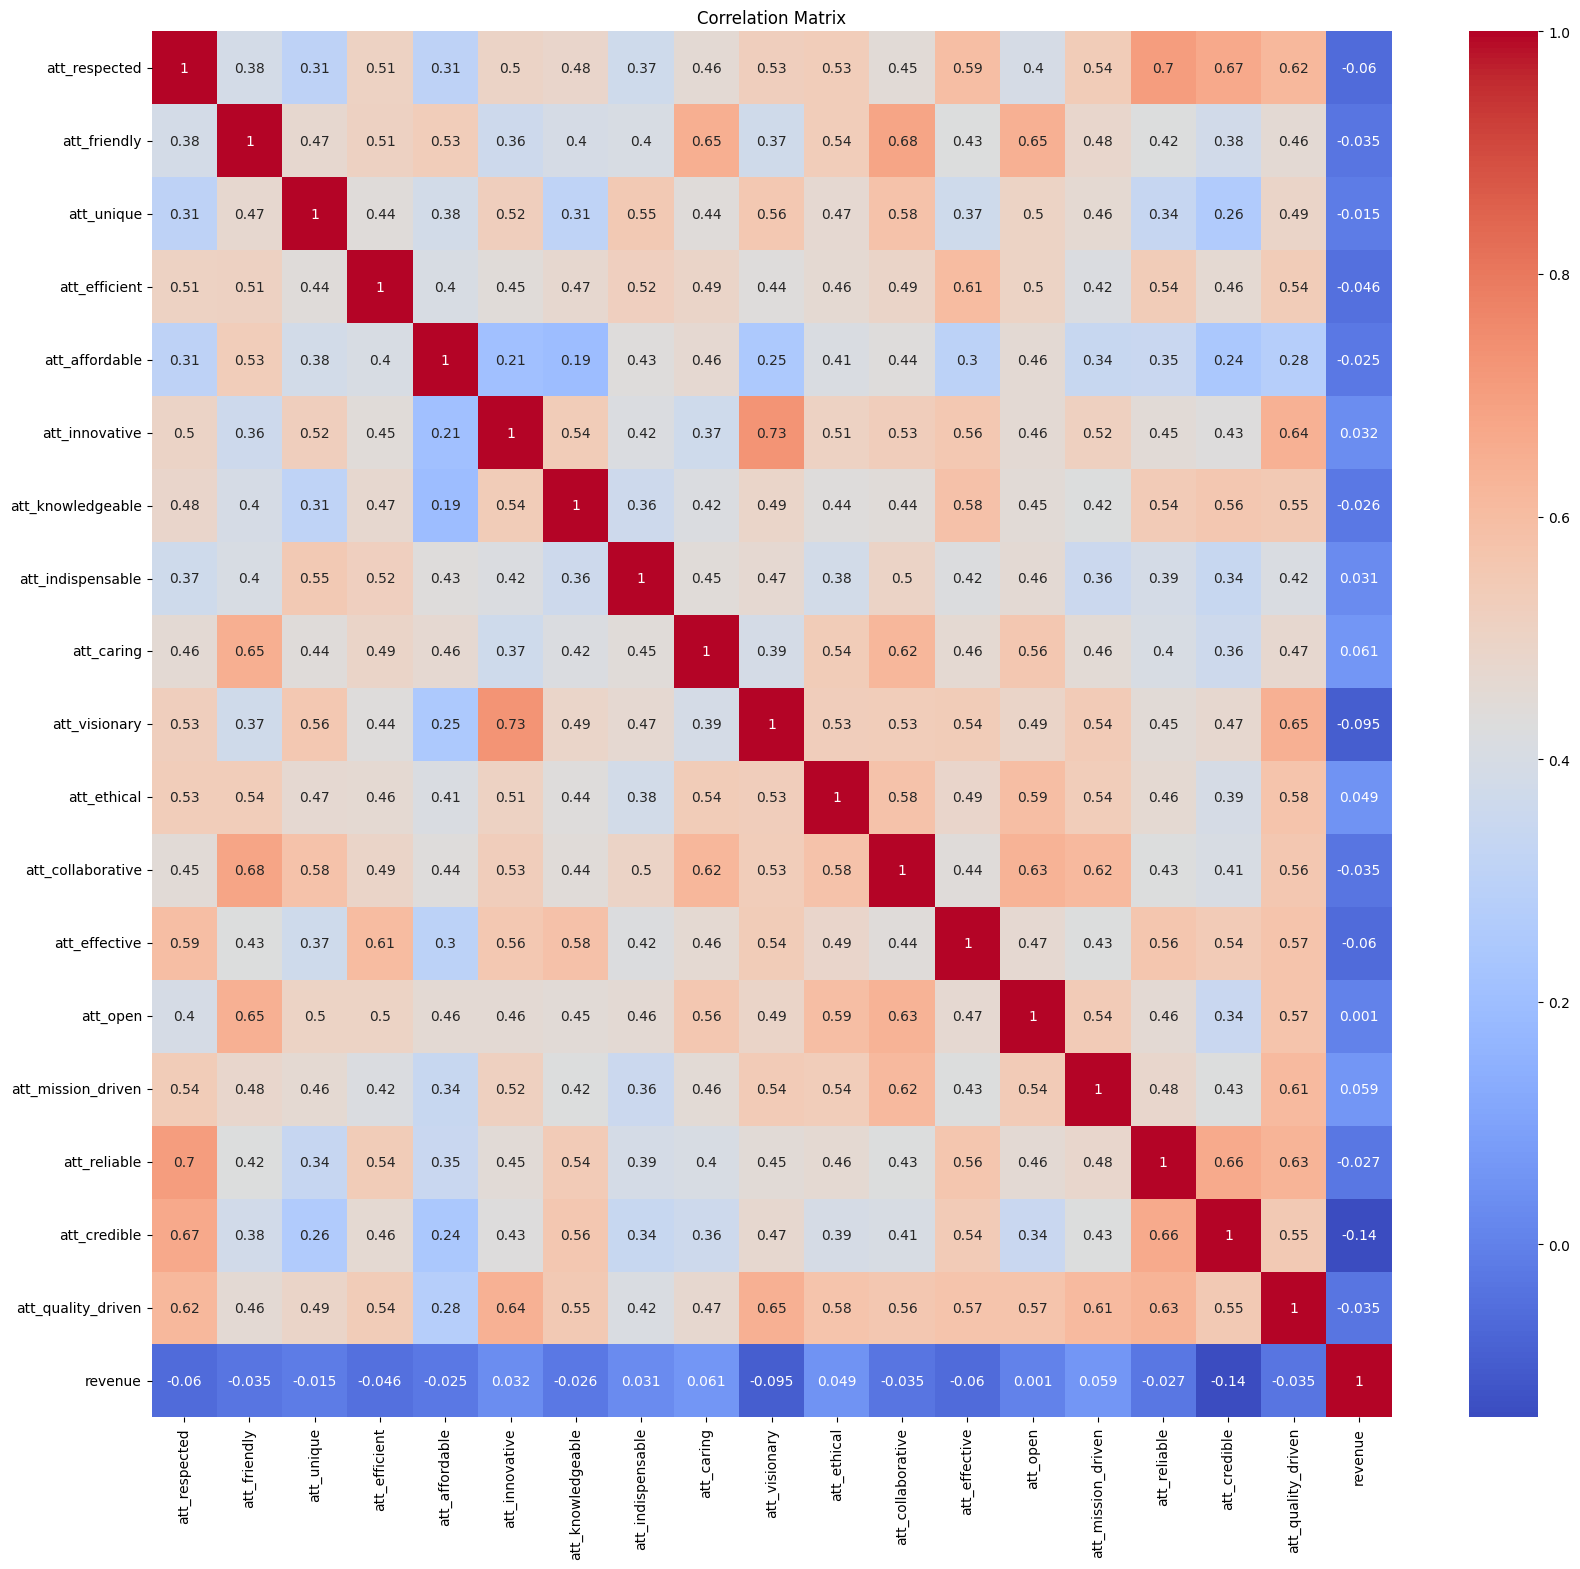

In [5]:
# Compute the correlation matrix
corr = df.iloc[:,5:24].corr()
# Plot the correlation matrix
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# create predictor and dependent variable dataframes
X1 = df[['att_innovative']]
X1 = X1.astype(float)

nps = df['nps']  # the Net Promoter Score is the first dependent variable
sentiment = df['sentiment']  # the Sentiment is the second dependent variable
intent = df['intent']  # the Intent is the third dependent variable

In [7]:
# create predictor and dependent variable dataframes
X1 = mdf[['att_innovative']]
X1 = X1.astype(float)

nps = mdf['nps']  # the Net Promoter Score is the first dependent variable
sentiment = mdf['sentiment']  # the Sentiment is the second dependent variable
intent = mdf['intent']  # the Intent is the third dependent variable

In [8]:
# create linear regression models for each dependent variable
nps_model = LinearRegression().fit(X1, nps)
sentiment_model = LinearRegression().fit(X1, sentiment)
intent_model = LinearRegression().fit(X1, intent)

# to get y from X 
y_nps = nps_model.predict(X1)
y_sentiment = sentiment_model.predict(X1)
y_intent = intent_model.predict(X1)

In [9]:
# compute evaluation metrics
mse_nps = mean_squared_error(nps, y_nps)
r2_nps = r2_score(nps, y_nps)

# print the evaluation metrics
print('Mean squared error: ', mse_nps)
print('R-squared score: ', r2_nps)

print("Coefficients:", nps_model.coef_)
print("Intercept:", nps_model.intercept_)

Mean squared error:  1.6780014382781938
R-squared score:  0.2061246118472152
Coefficients: [0.81835449]
Intercept: 4.607017894631609


In [10]:
# compute evaluation metrics
mse_sentiment = mean_squared_error(sentiment, y_sentiment)
r2_sentiment = r2_score(sentiment, y_sentiment)

# print the evaluation metrics
print('Mean squared error: ', mse_sentiment)
print('R-squared score: ', r2_sentiment)

print("Coefficients:", sentiment_model.coef_)
print("Intercept:", sentiment_model.intercept_)

Mean squared error:  0.7381317862705704
R-squared score:  0.28457423438626517
Coefficients: [0.67179846]
Intercept: 1.1980405878236526


In [11]:
# compute evaluation metrics
mse_intent = mean_squared_error(intent, y_intent)
r2_intent = r2_score(intent, y_intent)

# print the evaluation metrics
print('Mean squared error: ', mse_intent)
print('R-squared score: ', r2_intent)

print("Coefficients:", intent_model.coef_)
print("Intercept:", intent_model.intercept_)

Mean squared error:  0.5949860203229355
R-squared score:  0.21800965480079904
Coefficients: [0.50494852]
Intercept: 1.8695391382585211


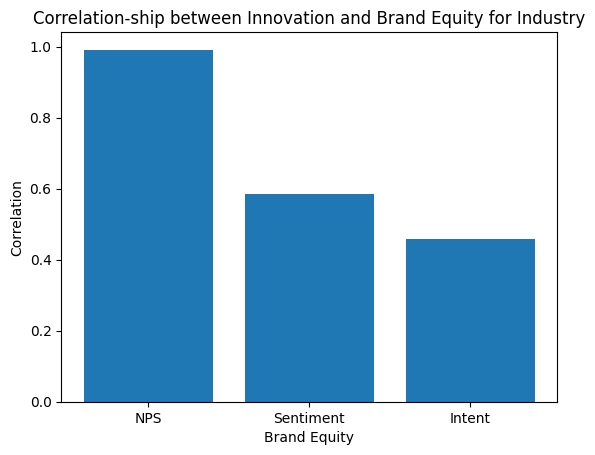

In [12]:
import matplotlib.pyplot as plt

# Data
nps_corr = 0.99112344
sentiment_corr = 0.58488211
intent_corr = 0.45825243

# X values
brands = ['NPS', 'Sentiment', 'Intent']

# Y values
correlations = [nps_corr, sentiment_corr, intent_corr]

# Create a bar plot
plt.bar(brands, correlations)

# Add chart title and labels for X and Y axis
plt.title("Correlation-ship between Innovation and Brand Equity for Industry")
plt.xlabel("Brand Equity")
plt.ylabel("Correlation")

# Show the plot
plt.show()


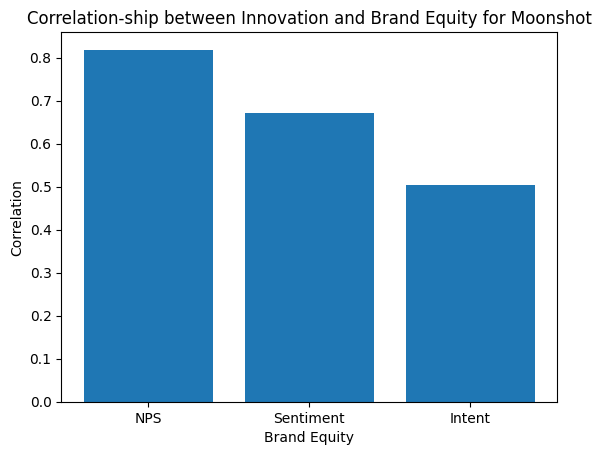

In [13]:
import matplotlib.pyplot as plt

# Data
nps_corr = 0.81835449
sentiment_corr = 0.67179846
intent_corr = 0.50494852

# X values
brands = ['NPS', 'Sentiment', 'Intent']

# Y values
correlations = [nps_corr, sentiment_corr, intent_corr]

# Create a bar plot
plt.bar(brands, correlations)

# Add chart title and labels for X and Y axis
plt.title("Correlation-ship between Innovation and Brand Equity for Moonshot")
plt.xlabel("Brand Equity")
plt.ylabel("Correlation")

# Show the plot
plt.show()


In [14]:
sentiment = df['sentiment']  # the Sentiment is the second dependent variable

X2 = df.drop(['sentiment', 'cid','brand'], axis=1)
X2 = X2.astype(float)

sentiment_model = LinearRegression().fit(X2, sentiment)
y_sentiment = sentiment_model.predict(X2)

# compute evaluation metrics
mse_sentiment = mean_squared_error(sentiment, y_sentiment)
r2_sentiment = r2_score(sentiment, y_sentiment)

# print the evaluation metrics
print('Mean squared error: ', mse_sentiment)
print('R-squared score: ', r2_sentiment)

print("Coefficients:", sentiment_model.coef_)
print("Intercept:", sentiment_model.intercept_)

Mean squared error:  0.3691470551580846
R-squared score:  0.6464342805475626
Coefficients: [ 0.30105468  0.19006975  0.06122727 -0.06273922 -0.01271439  0.06151803
  0.04780024  0.05511598  0.08444767 -0.0198926   0.01100069 -0.04563664
  0.0780207  -0.08971173 -0.05488405  0.06779963  0.1076412   0.07851127
  0.02447295  0.01470057 -0.12194009  0.00118973  0.00140947 -0.01062006
  0.04856073  0.00207258 -0.1146089   0.          0.08979179]
Intercept: -0.6826319465484794


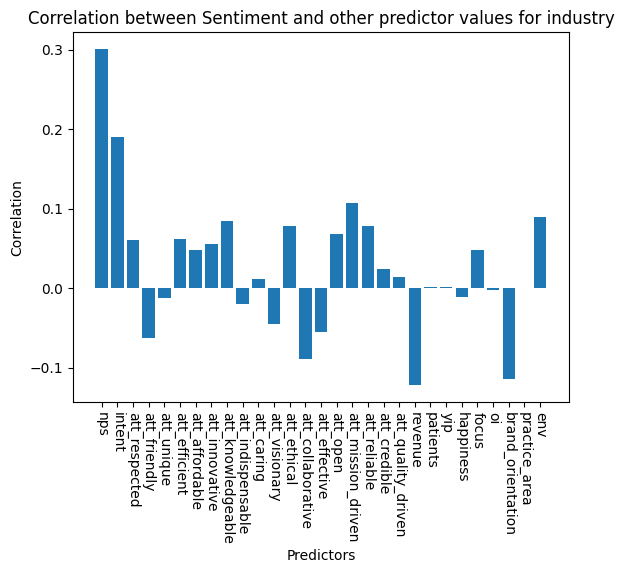

In [57]:
import matplotlib.pyplot as plt
coefficients = [0.30105468, 0.19006975, 0.06122727, -0.06273922, -0.01271439, 0.06151803,
           0.04780024, 0.05511598, 0.08444767, -0.0198926, 0.01100069, -0.04563664,
           0.0780207, -0.08971173, -0.05488405, 0.06779963, 0.1076412, 0.07851127,
           0.02447295, 0.01470057, -0.12194009, 0.00118973, 0.00140947, -0.01062006,
           0.04856073, 0.00207258, -0.1146089, 0.0, 0.08979179]
columns =  ['nps', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# Y values
coefficients_series

# X values
predictors =  ['nps', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Sentiment and other predictor values for industry")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


In [15]:
sentiment = mdf['sentiment']  # the Sentiment is the second dependent variable

X2 = mdf.drop(['sentiment', 'cid','brand'], axis=1)
X2 = X2.astype(float)

sentiment_model = LinearRegression().fit(X2, sentiment)
y_sentiment = sentiment_model.predict(X2)

# compute evaluation metrics
mse_sentiment = mean_squared_error(sentiment, y_sentiment)
r2_sentiment = r2_score(sentiment, y_sentiment)

# print the evaluation metrics
print('Mean squared error: ', mse_sentiment)
print('R-squared score: ', r2_sentiment)

print("Coefficients:", sentiment_model.coef_)
print("Intercept:", sentiment_model.intercept_)

Mean squared error:  0.28934276889370975
R-squared score:  0.7195578407394301
Coefficients: [ 3.18257241e-01  1.62984799e-01  1.05297984e-01  5.84204081e-02
  3.60009137e-02 -3.33400756e-02  9.26068998e-02  1.47297497e-01
  1.95561027e-02 -6.23158669e-02 -5.87530192e-02  2.16773547e-01
  1.15928916e-01 -2.03061554e-01 -2.31977276e-01  2.55526142e-02
  4.02378242e-02  3.03398214e-01 -1.36968298e-01  7.29343441e-03
 -9.92882275e-02  4.12978711e-05 -1.78044740e-02 -3.54138196e-02
  7.23615512e-02  7.79389476e-03 -8.67139935e-03  0.00000000e+00
  3.14510393e-02]
Intercept: -0.7583736342190619


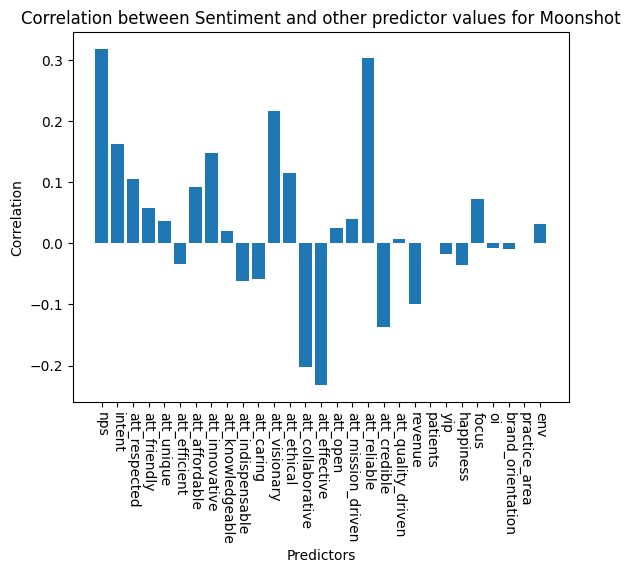

In [58]:
import matplotlib.pyplot as plt
coefficients = [3.18257241e-01, 1.62984799e-01, 1.05297984e-01, 5.84204081e-02,
                3.60009137e-02, -3.33400756e-02, 9.26068998e-02, 1.47297497e-01,
                1.95561027e-02, -6.23158669e-02, -5.87530192e-02, 2.16773547e-01,
                1.15928916e-01, -2.03061554e-01, -2.31977276e-01, 2.55526142e-02,
                4.02378242e-02, 3.03398214e-01, -1.36968298e-01, 7.29343441e-03,
                -9.92882275e-02, 4.12978711e-05, -1.78044740e-02, -3.54138196e-02,
                7.23615512e-02, 7.79389476e-03, -8.67139935e-03, 0.0, 3.14510393e-02]

colums = ['nps', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns) 

# X values
predictors =  ['nps', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, correlations)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Sentiment and other predictor values for Moonshot")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


In [16]:
nps = adf['nps'] 
sentiment = adf['sentiment'] 
intent = adf['intent'] 

X1 = adf.drop(['nps', 'cid','brand'], axis=1)
X1 = X1.astype(float)

X2 = adf.drop(['sentiment', 'cid','brand'], axis=1)
X2 = X2.astype(float)

X3 = adf.drop(['intent', 'cid','brand'], axis=1)
X3 = X3.astype(float)

nps_model = LinearRegression().fit(X1, nps)
sentiment_model = LinearRegression().fit(X2, sentiment)
intent_model = LinearRegression().fit(X3, intent)

y_nps = nps_model.predict(X1)
y_sentiment = sentiment_model.predict(X2)
y_intent = intent_model.predict(X3)


mse_nps = mean_squared_error(nps, y_nps)
r2_nps = r2_score(nps, y_nps)
print('Mean squared error: ', mse_nps)
print('R-squared score: ', r2_nps)
print("Coefficients:", nps_model.coef_)
print("Intercept:", nps_model.intercept_)


mse_sentiment = mean_squared_error(sentiment, y_sentiment)
r2_sentiment = r2_score(sentiment, y_sentiment)
print('Mean squared error: ', mse_sentiment)
print('R-squared score: ', r2_sentiment)
print("Coefficients:", sentiment_model.coef_)
print("Intercept:", sentiment_model.intercept_)


mse_intent = mean_squared_error(intent, y_intent)
r2_intent = r2_score(intent, y_intent)
print('Mean squared error: ', mse_intent)
print('R-squared score: ', r2_intent)
print("Coefficients:", intent_model.coef_)
print("Intercept:", intent_model.intercept_)

Mean squared error:  0.6379964161996748
R-squared score:  0.794001996642125
Coefficients: [ 0.607993    0.30074618  0.3292382   0.15153344 -0.06697403  0.02753074
 -0.39327251 -0.22466536 -0.16417596  0.20008657 -0.05350029  0.02786465
 -0.02199466  0.22789627  0.25599771 -0.00999493  0.28933995  0.47860427
 -0.02264423 -0.13910804 -0.0452376   0.00437948 -0.07803387 -0.23808139
 -0.51823035  0.00467383  0.16125894  0.         -0.27706155]
Intercept: 2.282920656962869
Mean squared error:  0.24772292312803562
R-squared score:  0.7688289257857077
Coefficients: [ 2.36073119e-01  3.81619527e-01  3.87596653e-01 -1.85201389e-01
 -8.17435008e-02 -2.04413521e-02  1.04295778e-01  8.49182235e-02
 -9.90132659e-02 -4.69817376e-02 -1.18726118e-02 -1.21617716e-01
  7.09952882e-02 -1.20495274e-01 -2.28766886e-01  6.59208875e-02
  1.69977946e-01 -3.39559200e-02  3.29463509e-01  1.17375091e-01
 -8.33605077e-02 -1.77379183e-04  4.06365092e-02  5.04893360e-02
  1.52443625e-02 -5.31149985e-03  5.09556714e

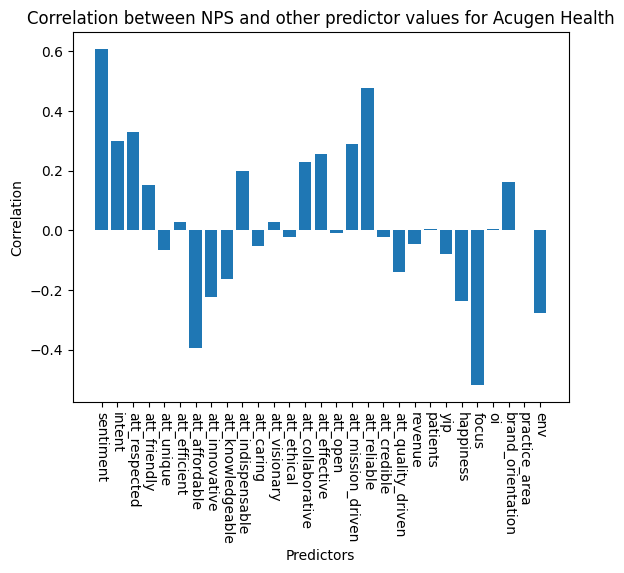

In [60]:
coefficients = [0.607993, 0.30074618, 0.3292382, 0.15153344, -0.06697403, 0.02753074, -0.39327251, -0.22466536, -0.16417596, 0.20008657, -0.05350029, 0.02786465, -0.02199466, 0.22789627, 0.25599771, -0.00999493, 0.28933995, 0.47860427, -0.02264423, -0.13910804, -0.0452376, 0.00437948, -0.07803387, -0.23808139, -0.51823035, 0.00467383, 0.16125894, 0.0, -0.27706155]
columns = ['sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between NPS and other predictor values for Acugen Health")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


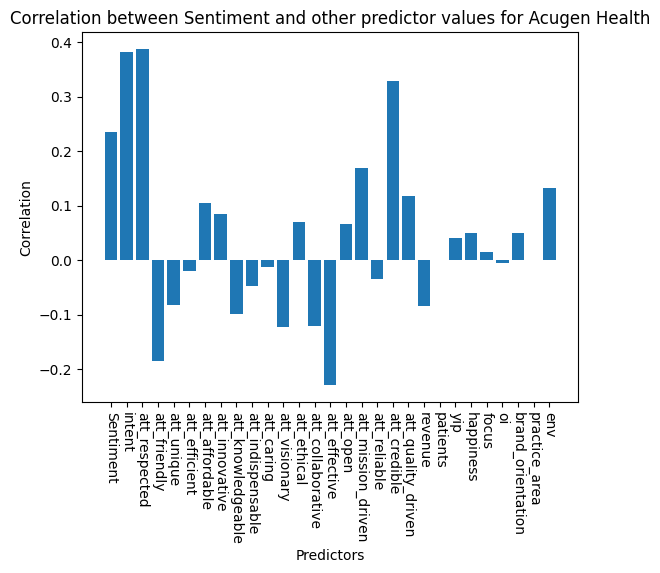

In [62]:
coefficients = [2.36073119e-01, 3.81619527e-01, 3.87596653e-01, -1.85201389e-01,
                -8.17435008e-02, -2.04413521e-02, 1.04295778e-01, 8.49182235e-02,
                -9.90132659e-02, -4.69817376e-02, -1.18726118e-02, -1.21617716e-01,
                7.09952882e-02, -1.20495274e-01, -2.28766886e-01, 6.59208875e-02,
                1.69977946e-01, -3.39559200e-02, 3.29463509e-01, 1.17375091e-01,
                -8.33605077e-02, -1.77379183e-04, 4.06365092e-02, 5.04893360e-02,
                1.52443625e-02, -5.31149985e-03, 5.09556714e-02, 0.00000000e+00,
                1.32754343e-01]

columns = ['Sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['Sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Sentiment and other predictor values for Acugen Health")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


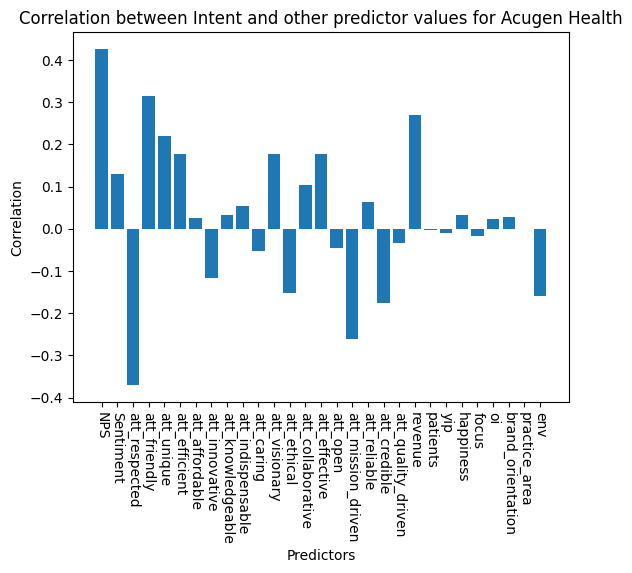

In [63]:
coefficients = [0.42596929, 0.13034542, -0.37011366, 0.31554114, 0.21891217, 0.17710574,
                0.0266291, -0.11757167, 0.03258178, 0.05500149, -0.05222655, 0.17696821,
                -0.1512631, 0.10382369, 0.17815385, -0.04604269, -0.26159704, 0.06436715,
                -0.17556189, -0.03327107, 0.26940936, -0.00239242, -0.0099888, 0.03302018,
                -0.01807452, 0.02303367, 0.02810719, 0.0, -0.15881635]

columns = ['NPS', 'Sentiment', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['NPS', 'Sentiment', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Intent and other predictor values for Acugen Health")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


In [17]:
nps = vdf['nps'] 
sentiment = vdf['sentiment'] 
intent = vdf['intent'] 

X1 = vdf.drop(['nps', 'cid','brand'], axis=1)
X1 = X1.astype(float)

X2 = vdf.drop(['sentiment', 'cid','brand'], axis=1)
X2 = X2.astype(float)

X3 = vdf.drop(['intent', 'cid','brand'], axis=1)
X3 = X3.astype(float)

nps_model = LinearRegression().fit(X1, nps)
sentiment_model = LinearRegression().fit(X2, sentiment)
intent_model = LinearRegression().fit(X3, intent)

y_nps = nps_model.predict(X1)
y_sentiment = sentiment_model.predict(X2)
y_intent = intent_model.predict(X3)


mse_nps = mean_squared_error(nps, y_nps)
r2_nps = r2_score(nps, y_nps)
print('Mean squared error: ', mse_nps)
print('R-squared score: ', r2_nps)
print("Coefficients:", nps_model.coef_)
print("Intercept:", nps_model.intercept_)


mse_sentiment = mean_squared_error(sentiment, y_sentiment)
r2_sentiment = r2_score(sentiment, y_sentiment)
print('Mean squared error: ', mse_sentiment)
print('R-squared score: ', r2_sentiment)
print("Coefficients:", sentiment_model.coef_)
print("Intercept:", sentiment_model.intercept_)


mse_intent = mean_squared_error(intent, y_intent)
r2_intent = r2_score(intent, y_intent)
print('Mean squared error: ', mse_intent)
print('R-squared score: ', r2_intent)
print("Coefficients:", intent_model.coef_)
print("Intercept:", intent_model.intercept_)

Mean squared error:  0.7939455217985182
R-squared score:  0.6895235064044987
Coefficients: [ 0.69408897  0.31089581 -0.1582651   0.10343169  0.10832604  0.01037389
  0.02748926  0.17576738 -0.34230741  0.071647    0.11927937 -0.0137482
  0.07416598 -0.02405946  0.52622234 -0.24186989 -0.15112657  0.25890508
 -0.04642923  0.22478764 -0.10244375 -0.00096634  0.03394359 -0.05704569
 -0.24413664  0.00458568  0.06849587  0.         -0.12090305]
Intercept: 1.8045471773683701
Mean squared error:  0.33979657245584005
R-squared score:  0.6660804122878929
Coefficients: [ 0.29705949  0.16141232 -0.04194861  0.05929262 -0.0536623   0.09513953
 -0.00419983  0.09284149  0.19812644  0.02116621 -0.04932278 -0.02926098
  0.08059659 -0.0571246  -0.0995766   0.11960573  0.16271266  0.21101196
 -0.198604   -0.09290658 -0.19763711  0.00312206 -0.01485862 -0.03529229
  0.02266333 -0.00695183 -0.13634491  0.          0.02135206]
Intercept: -0.10991278637283752
Mean squared error:  0.4481640640181415
R-square

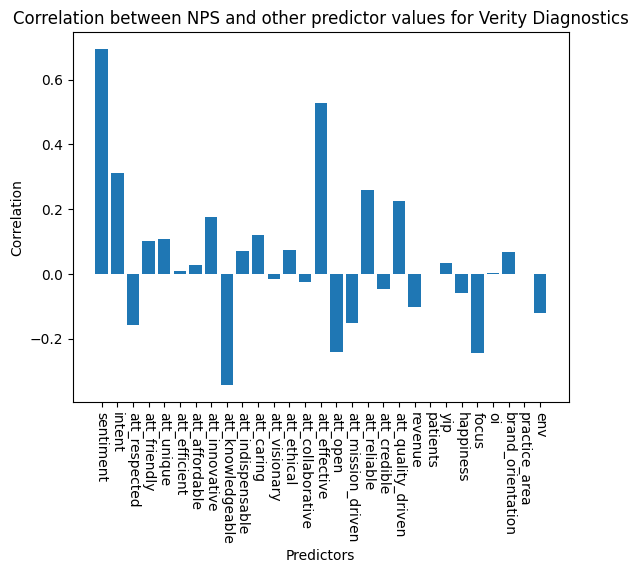

In [66]:
coefficients = [0.69408897, 0.31089581, -0.1582651, 0.10343169, 0.10832604, 0.01037389, 0.02748926, 0.17576738,
                -0.34230741, 0.071647, 0.11927937, -0.0137482, 0.07416598, -0.02405946, 0.52622234, -0.24186989,
                -0.15112657, 0.25890508, -0.04642923, 0.22478764, -0.10244375, -0.00096634, 0.03394359, -0.05704569,
                -0.24413664, 0.00458568, 0.06849587, 0.0, -0.12090305]
columns = ['sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between NPS and other predictor values for Verity Diagnostics")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


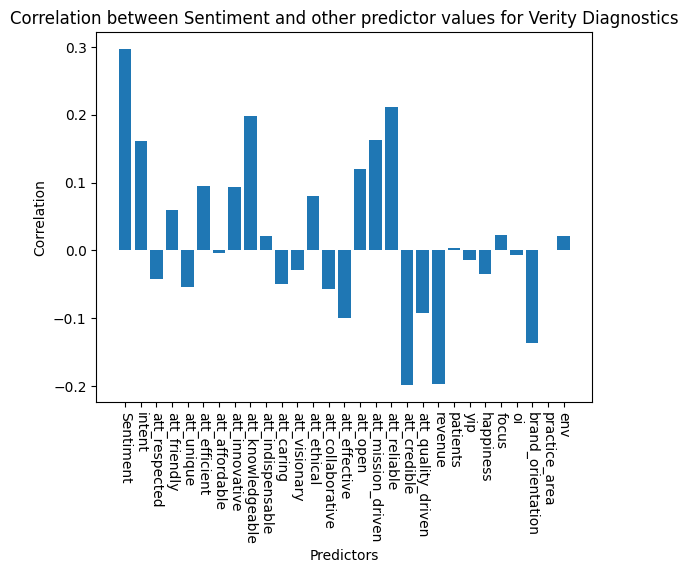

In [64]:
coefficients = [0.29705949, 0.16141232, -0.04194861, 0.05929262, -0.0536623, 0.09513953,           -0.00419983, 0.09284149, 0.19812644, 0.02116621, -0.04932278, -0.02926098,           0.08059659, -0.0571246, -0.0995766, 0.11960573, 0.16271266, 0.21101196,          -0.198604, -0.09290658, -0.19763711, 0.00312206, -0.01485862, -0.03529229,           0.02266333, -0.00695183, -0.13634491, 0, 0.02135206]
columns = ['Sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['Sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Sentiment and other predictor values for Verity Diagnostics")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


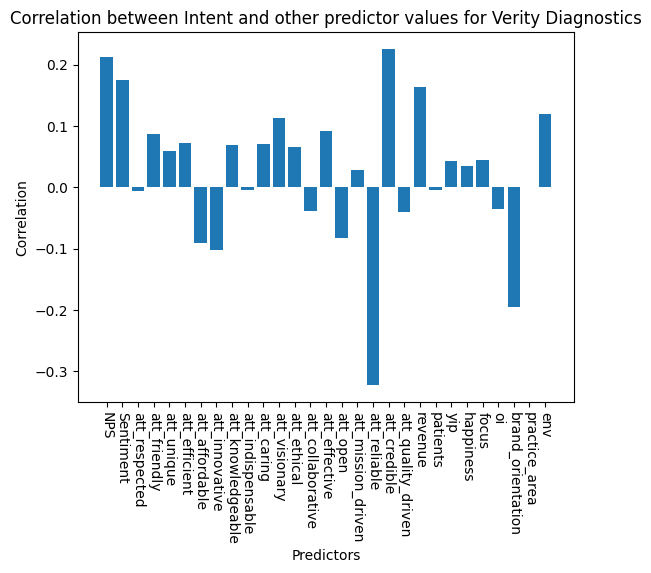

In [65]:
coefficients = [0.21288973, 0.17549357, -0.00514748, 0.08777773, 0.06006616, 0.07308363,          -0.09038379, -0.10132815, 0.06848914, -0.0041998, 0.07124883, 0.11337627,           0.06663403, -0.03798495, 0.09144704, -0.08243815, 0.02894858, -0.32222398,           0.22558096, -0.03971315, 0.16299377, -0.00465303, 0.04285348, 0.03416559,           0.04484478, -0.03576646, -0.19424219, 0, 0.11946336]

columns = ['NPS', 'Sentiment', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['NPS', 'Sentiment', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Intent and other predictor values for Verity Diagnostics")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


In [18]:
nps = mdf['nps'] 
sentiment = mdf['sentiment'] 
intent = mdf['intent'] 

X1 = mdf.drop(['nps', 'cid','brand'], axis=1)
X1 = X1.astype(float)

X2 = mdf.drop(['sentiment', 'cid','brand'], axis=1)
X2 = X2.astype(float)

X3 = mdf.drop(['intent', 'cid','brand'], axis=1)
X3 = X3.astype(float)

nps_model = LinearRegression().fit(X1, nps)
sentiment_model = LinearRegression().fit(X2, sentiment)
intent_model = LinearRegression().fit(X3, intent)

y_nps = nps_model.predict(X1)
y_sentiment = sentiment_model.predict(X2)
y_intent = intent_model.predict(X3)


mse_nps = mean_squared_error(nps, y_nps)
r2_nps = r2_score(nps, y_nps)
print('Mean squared error: ', mse_nps)
print('R-squared score: ', r2_nps)
print("Coefficients:", nps_model.coef_)
print("Intercept:", nps_model.intercept_)


mse_sentiment = mean_squared_error(sentiment, y_sentiment)
r2_sentiment = r2_score(sentiment, y_sentiment)
print('Mean squared error: ', mse_sentiment)
print('R-squared score: ', r2_sentiment)
print("Coefficients:", sentiment_model.coef_)
print("Intercept:", sentiment_model.intercept_)


mse_intent = mean_squared_error(intent, y_intent)
r2_intent = r2_score(intent, y_intent)
print('Mean squared error: ', mse_intent)
print('R-squared score: ', r2_intent)
print("Coefficients:", intent_model.coef_)
print("Intercept:", intent_model.intercept_)

Mean squared error:  0.6135109728348324
R-squared score:  0.7097432394366652
Coefficients: [ 0.67482008  0.22430019  0.20242209 -0.08067666 -0.01291781 -0.01533151
  0.01739258 -0.08805438 -0.00370977 -0.01219856  0.12738466 -0.10350566
  0.02776161  0.13916086  0.13894378  0.09096292  0.07425669  0.01387804
  0.2389191   0.00729661 -0.04794943  0.00247009  0.00520242  0.10482998
  0.01789886 -0.01718901 -0.11571095  0.          0.09577773]
Intercept: 1.200506300003954
Mean squared error:  0.28934276889370975
R-squared score:  0.7195578407394301
Coefficients: [ 3.18257241e-01  1.62984799e-01  1.05297984e-01  5.84204081e-02
  3.60009137e-02 -3.33400756e-02  9.26068998e-02  1.47297497e-01
  1.95561027e-02 -6.23158669e-02 -5.87530192e-02  2.16773547e-01
  1.15928916e-01 -2.03061554e-01 -2.31977276e-01  2.55526142e-02
  4.02378242e-02  3.03398214e-01 -1.36968298e-01  7.29343441e-03
 -9.92882275e-02  4.12978711e-05 -1.78044740e-02 -3.54138196e-02
  7.23615512e-02  7.79389476e-03 -8.67139935

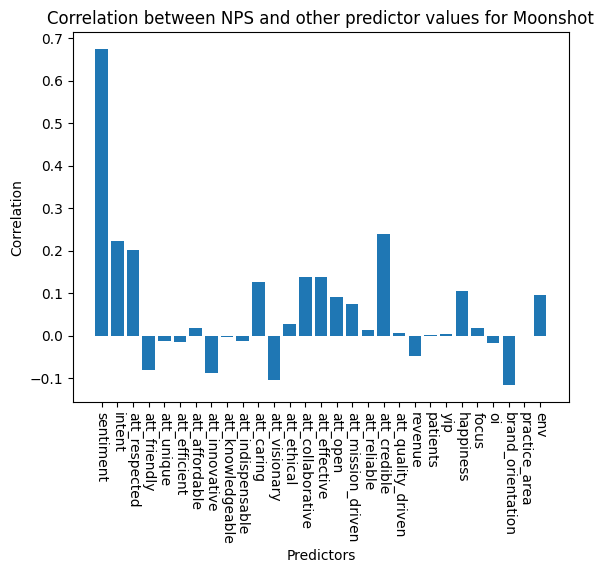

In [74]:
coefficients =  [0.67482008, 0.22430019, 0.20242209, -0.08067666, -0.01291781, -0.01533151, 0.01739258, -0.08805438, -0.00370977, -0.01219856, 0.12738466, -0.10350566, 0.02776161, 0.13916086, 0.13894378, 0.09096292, 0.07425669, 0.01387804, 0.2389191, 0.00729661, -0.04794943, 0.00247009, 0.00520242, 0.10482998, 0.01789886, -0.01718901, -0.11571095, 0.0, 0.09577773]
columns = ['sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between NPS and other predictor values for Moonshot")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


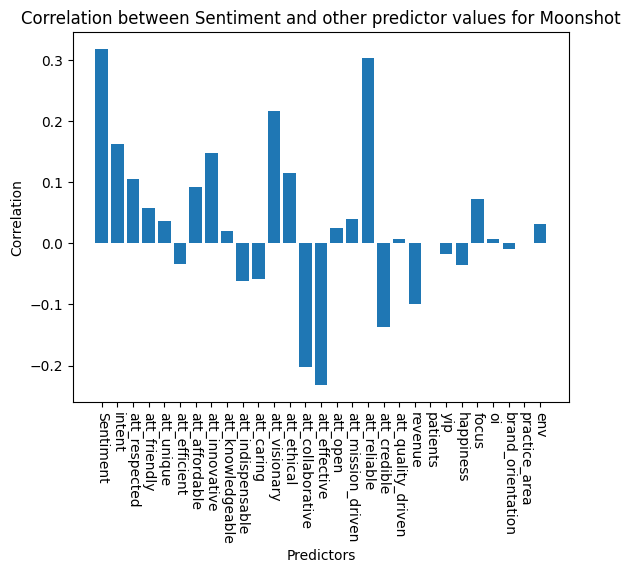

In [75]:
coefficients = [0.318257241, 0.162984799, 0.105297984, 0.0584204081, 0.0360009137, -0.0333400756, 0.0926068998, 0.147297497, 0.0195561027, -0.0623158669, -0.0587530192, 0.216773547, 0.115928916, -0.203061554, -0.231977276, 0.0255526142, 0.0402378242, 0.303398214, -0.136968298, 0.00729343441, -0.0992882275, 4.12978711e-05, -0.017804474, -0.0354138196, 0.0723615512, 0.00779389476, -0.00867139935, 0.0, 0.0314510393]
columns = ['Sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['Sentiment', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Sentiment and other predictor values for Moonshot")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


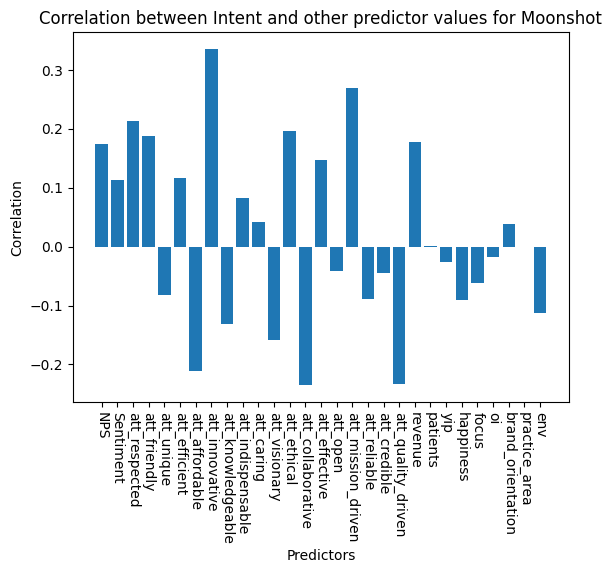

In [76]:
coefficients = [0.17356864, 0.11265335, 0.21405355, 0.18753542, -0.08169021, 0.11705858, -0.21031866, 0.33550172, -0.13086869, 0.08225687, 0.04258196, -0.15855454, 0.19653347, -0.23497449, 0.14628743, -0.04122219, 0.26924323, -0.08892072, -0.04498344, -0.23277108, 0.17683699, 0.0005029, -0.02680795, -0.09128979, -0.06119538, -0.01773592, 0.03854326, 0.0, -0.11202826]

columns = ['NPS', 'Sentiment', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']
coefficients_series = pd.Series(coefficients, index=columns)

# X values
predictors =  ['NPS', 'Sentiment', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary','att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'patients', 'yip', 'happiness', 'focus', 'oi', 'brand_orientation', 'practice_area', 'env']

# Y values
coefficients_series

# Create a bar plot
plt.bar(predictors, coefficients_series)

# Rotate x-axis labels vertically
plt.xticks(rotation=-90)

# Add chart title and labels for X and Y axis
plt.title("Correlation between Intent and other predictor values for Moonshot")
plt.xlabel("Predictors")
plt.ylabel("Correlation")


# Show the plot
plt.show()


In [67]:
dfn = mdf
dfn = dfn.drop('cid', axis=1)
df_encoded = pd.get_dummies(dfn, columns=['brand', 'sentiment', 'nps', 'intent', 'att_respected', 'att_friendly', 'att_unique', 'att_efficient', 'att_affordable', 'att_innovative', 'att_knowledgeable', 'att_indispensable', 'att_caring', 'att_visionary', 'att_ethical', 'att_collaborative', 'att_effective', 'att_open', 'att_mission_driven', 'att_reliable', 'att_credible', 'att_quality_driven', 'revenue', 'happiness', 'focus', 'brand_orientation', 'practice_area', 'env']
)

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # number of components to keep
X_pca = pca.fit_transform(df_encoded)

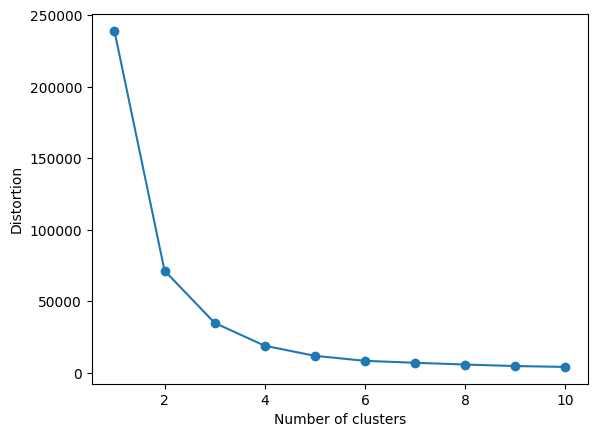

In [68]:
# import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# determine the optimal number of clusters using elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [69]:
# perform k-means clustering on the PCA data with k=4 (as an example)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
dfn['y_kmeans'] = y_kmeans

In [79]:
dfn

,brand,sentiment,nps,intent,att_respected,att_friendly,att_unique,att_efficient,att_affordable,att_innovative,...,revenue,patients,yip,happiness,focus,oi,brand_orientation,practice_area,env,y_kmeans
3,Moonshot Clinical,5,9,5,4,1,5,4,2,4,...,3,216,17,2,1,19,1,1,2,0
6,Moonshot Clinical,2,6,2,2,2,4,2,2,3,...,3,178,8,5,1,29,2,1,1,2
7,Moonshot Clinical,4,8,4,4,4,4,4,5,5,...,3,215,11,4,1,20,1,1,2,0
8,Moonshot Clinical,4,6,4,4,1,4,3,3,4,...,3,145,4,4,1,22,1,1,1,2
9,Moonshot Clinical,4,8,4,4,4,4,5,3,4,...,2,160,11,2,2,21,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Moonshot Clinical,5,10,5,5,4,5,5,3,5,...,2,146,7,4,2,22,2,1,1,2
228,Moonshot Clinical,4,8,4,4,4,4,5,2,4,...,2,163,2,4,2,21,1,1,1,2
229,Moonshot Clinical,5,10,4,5,5,5,4,4,5,...,2,167,3,3,2,21,2,1,1,2
230,Moonshot Clinical,4,7,4,3,3,3,3,4,5,...,3,252,10,3,2,28,1,1,3,1


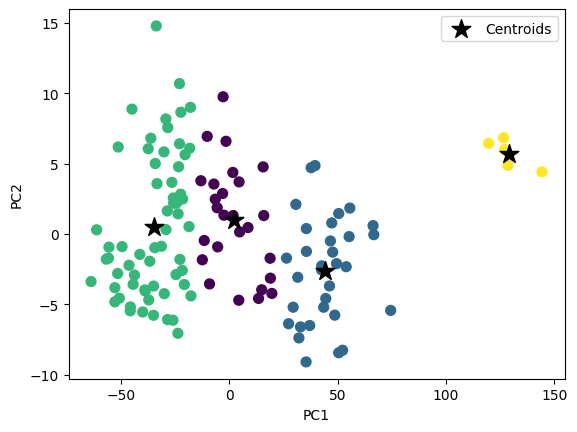

In [70]:
# plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_25944\1584473482.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[y_kmeans==label, 0], X_pca[y_kmeans==label, 1], s=50, cmap='viridis', label=f'Cluster {label}')


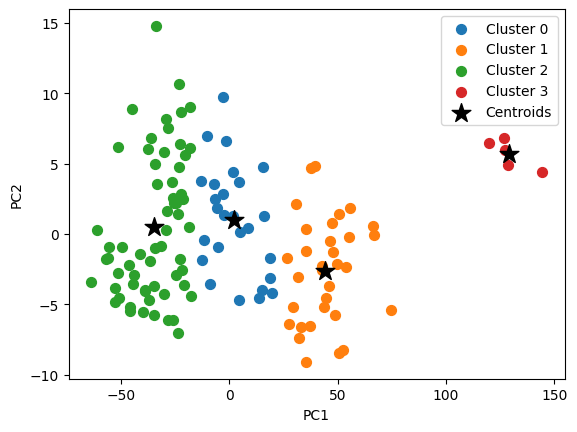

In [80]:
# get unique labels in y_kmeans
labels = np.unique(y_kmeans)

# plot each cluster with different color and label
for label in labels:
    plt.scatter(X_pca[y_kmeans==label, 0], X_pca[y_kmeans==label, 1], s=50, cmap='viridis', label=f'Cluster {label}')

# plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='black', label='Centroids')

# add axis labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [71]:
# Group the data by cluster and calculate mean values for each genre
cluster_means = dfn.groupby('y_kmeans').mean()
cmdf = pd.DataFrame(cluster_means)

C:\Users\nikit\AppData\Local\Temp\ipykernel_25944\2123762077.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = dfn.groupby('y_kmeans').mean()


In [72]:
cmdf

,sentiment,nps,intent,att_respected,att_friendly,att_unique,att_efficient,att_affordable,att_innovative,att_knowledgeable,...,att_quality_driven,revenue,patients,yip,happiness,focus,oi,brand_orientation,practice_area,env
y_kmeans,,,,,,,,,,,,,,,,,,,,,
0,4.269231,8.384615,4.269231,4.115385,3.615385,4.153846,4.115385,3.576923,4.692308,4.461538,...,4.192308,2.730769,203.346154,11.153846,2.884615,1.346154,25.230769,1.576923,1.0,1.500000
1,4.156250,8.156250,4.156250,3.843750,3.562500,4.000000,3.781250,3.250000,4.375000,4.000000,...,3.656250,2.968750,245.750000,11.531250,3.468750,1.500000,23.125000,1.625000,1.0,1.281250
2,4.131148,8.180328,3.983607,3.967213,3.803279,4.131148,4.032787,3.213115,4.213115,4.262295,...,4.081967,2.213115,166.852459,7.622951,3.819672,1.344262,24.163934,1.622951,1.0,1.278689
3,3.200000,7.200000,3.600000,3.800000,3.600000,3.600000,3.800000,2.800000,4.400000,4.000000,...,3.800000,4.000000,329.800000,25.200000,2.800000,1.400000,31.400000,1.800000,1.0,1.600000


In [73]:
# export the dataframe to an excel file
cmdf.to_excel('cmdf.xlsx', index=False)